Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма: strategy, maxiter, popsize, tol, mutation, recombination и updating. Постройте графики количества итераций оптимизации функции ackley от значения параметра. 
Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [1]:
import numpy as np
import pandas as pd
import random
from random import shuffle
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.])

###  Для решения задачи создадим массив случайных значений переменных для рассматриваемой функции и расчитаем целевое значение функции для различных параметров входящих переменных.

In [24]:
df   = pd.DataFrame(columns = ['strateg'])

str_                  = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 
                       'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 
                       'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']

strategies           = str_ * 1000
shuffle(strategies)
df['strateg']        = strategies

df['popsize']        = np.random.randint(2, 101, 12000)
df['maxiter']        = np.random.randint(1, 101, 12000)
df['tol']            = np.random.randint(0,   2, 12000)
df['mutation']       = np.random.random (12000)*2
df['recombination']  = np.random.random (12000)

upd                  = ['immediate', 'deferred']
update_s             = upd * 6000
shuffle(update_s)
df['update']         = update_s

In [84]:
# df['result'] = np.nan

for i in range (11561, 11976):
    try:
        df.iloc[i,7] = differential_evolution(ackley, bounds, 
                                          strategy      = df.iloc[i,0],
                                          popsize       = df.iloc[i,1],
                                          maxiter       = df.iloc[i,2],
                                          tol           = df.iloc[i,3],
                                          mutation      = df.iloc[i,4],
                                          recombination = df.iloc[i,5], 
                                          updating      = df.iloc[i,6],
                                          seed          = 42)['message']

    except:
        print (df.iloc(i))

In [81]:
df = df.drop([11563]).reset_index().iloc[:,1:]

###### Не всегда для случайных значений функция сходилась - пришлось кое что править ручками

In [86]:
df['result_fun'] = np.nan

for i in range (11976):
    df.iloc[i,8] = differential_evolution(ackley, bounds, 
                                          strategy      = df.iloc[i,0],
                                          popsize       = df.iloc[i,1],
                                          maxiter       = df.iloc[i,2],
                                          tol           = df.iloc[i,3],
                                          mutation      = df.iloc[i,4],
                                          recombination = df.iloc[i,5], 
                                          updating      = df.iloc[i,6],
                                          seed          = 42)['fun']

In [87]:
df['result_fun'].describe()

count    1.197600e+04
mean     9.320209e-01
std      1.582844e+00
min      4.440892e-16
25%      1.105592e-08
50%      1.712174e-08
75%      2.579928e+00
max      9.353039e+00
Name: result_fun, dtype: float64

In [ ]:
# сохраняем случайную выборку 
df.to_csv('Math_test_base.csv', sep="\t")
df = pd.read_csv('Math_test_base.csv', sep="\t").iloc[:,1:]

In [6]:
df.head()

,strateg,popsize,maxiter,tol,mutation,recombination,update,result,result_fun
0,best2exp,94,87,0,1.166279,0.603186,deferred,Maximum number of iterations has been exceeded.,1.341300e-08
1,randtobest1exp,58,85,0,1.808094,0.738122,deferred,Maximum number of iterations has been exceeded.,9.996477e-09
2,randtobest1exp,62,58,0,1.957992,0.853530,immediate,Maximum number of iterations has been exceeded.,1.855736e-08
3,currenttobest1bin,75,59,1,1.861027,0.861870,deferred,Optimization terminated successfully.,2.579928e+00
4,rand2exp,37,55,0,1.668217,0.986816,immediate,Maximum number of iterations has been exceeded.,2.032795e-08


### Найдем множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [108]:
df[(df.result == 'Optimization terminated successfully.')&
    (df.maxiter==1)]

,strateg,popsize,maxiter,tol,mutation,recombination,update,result,result_fun
579,best2exp,50,1,1,1.852166,0.708785,deferred,Optimization terminated successfully.,2.579928e+00
600,rand2exp,55,1,1,0.347327,0.435060,immediate,Optimization terminated successfully.,1.405811e-08
646,randtobest1bin,32,1,1,1.779504,0.178854,immediate,Optimization terminated successfully.,1.970922e-08
2052,currenttobest1bin,84,1,1,0.755943,0.398373,immediate,Optimization terminated successfully.,2.579928e+00
2072,rand1bin,76,1,1,0.576093,0.845517,immediate,Optimization terminated successfully.,2.579928e+00
2211,randtobest1bin,68,1,1,0.995485,0.090694,deferred,Optimization terminated successfully.,2.579928e+00
2328,randtobest1bin,16,1,1,1.811402,0.127999,immediate,Optimization terminated successfully.,3.574452e+00
2456,rand1exp,52,1,1,1.892733,0.917306,immediate,Optimization terminated successfully.,3.574452e+00
2783,currenttobest1exp,79,1,1,0.786736,0.277288,deferred,Optimization terminated successfully.,2.579928e+00
2865,best2bin,2,1,1,1.993223,0.740953,deferred,Optimization terminated successfully.,9.117902e-09


In [110]:
table    = pd.pivot_table(df[(df.result == 'Optimization terminated successfully.')& (df.maxiter<11)], 
                          values = ['result_fun'],  
                          index =  ['maxiter'],                          
                          aggfunc = ['min', 'max'])
table

,min,max
,result_fun,result_fun
maxiter,,
1,2.163180e-09,6.882583
2,3.121386e-09,6.882583
3,1.443770e-09,6.882583
4,1.533558e-09,6.882583
5,3.121145e-09,7.180952
6,1.443770e-09,5.381864
7,7.006453e-10,6.559645
8,3.520754e-09,6.559645


### Посмотрим со стороны, какие параметры наиболее важны для рассматриваемой функции со стороны ... например со стороны feature_importances Случайного леса

In [7]:
df1 = df.iloc[:,[8,1,2,3,4,5]]
df2 = pd.get_dummies(df.iloc[:,[0,6]])

df_rf = pd.concat([df1, df2], axis = 1)      


In [8]:
df_rf

,result_fun,popsize,maxiter,tol,mutation,recombination,strateg_best1bin,strateg_best1exp,strateg_best2bin,strateg_best2exp,strateg_currenttobest1bin,strateg_currenttobest1exp,strateg_rand1bin,strateg_rand1exp,strateg_rand2bin,strateg_rand2exp,strateg_randtobest1bin,strateg_randtobest1exp,update_deferred,update_immediate
0,1.341300e-08,94,87,0,1.166279,0.603186,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,9.996477e-09,58,85,0,1.808094,0.738122,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,1.855736e-08,62,58,0,1.957992,0.853530,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,2.579928e+00,75,59,1,1.861027,0.861870,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,2.032795e-08,37,55,0,1.668217,0.986816,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11971,2.186499e-08,65,25,0,1.668497,0.178953,0,0,0,0,0,0,1,0,0,0,0,0,0,1
11972,1.435109e-08,69,50,0,1.929922,0.592408,0,0,0,1,0,0,0,0,0,0,0,0,0,1
11973,1.530138e-08,59,31,0,1.146023,0.327434,0,0,1,0,0,0,0,0,0,0,0,0,1,0
11974,2.579928e+00,71,67,1,0.741265,0.405875,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [11]:
def feature_report (feature_col):
    output_y = df_rf.iloc[:,0]
    input_x  = df_rf.iloc[:,feature_col]
    
    targets  = output_y
 
    x_train, x_test, y_train, y_test = train_test_split(input_x, 
                                                        output_y, 
                                                        test_size = 0.15, 
                                                        random_state = 10000)
    model=RandomForestRegressor(n_estimators=100)
    model.fit(x_train,y_train)
    model_pred = model.predict(x_test)
    # print(classification_report(y_test, model_pred))
    print('Точность модели составила (%)', 100*model.score(x_test, y_test))
    # формируем рэнкинг параметров по уровню значимости влияния 
    headers = list(input_x.columns.values)
    feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)
    f, ax = plt.subplots(figsize=(6, 6))
    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.xlabel('Уровень значимости параметров')
    plt.ylabel('Параметры')
    plt.title('Рэнкинг значимости параметров')
    plt.show()

Точность модели составила (%) 54.465388125311776


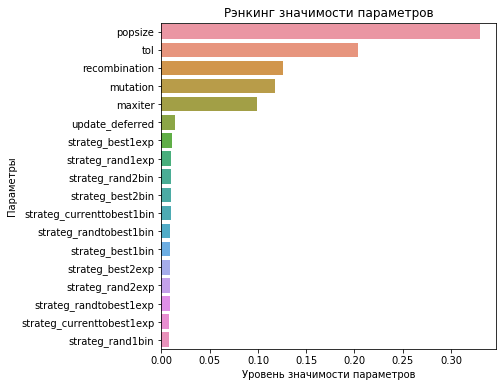

In [12]:
feature_report([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])

### Посмотрим, как распределено значение целевой функции по медиане в зависмости от вида стратегии и размера популяции

(12.0, 0.0)

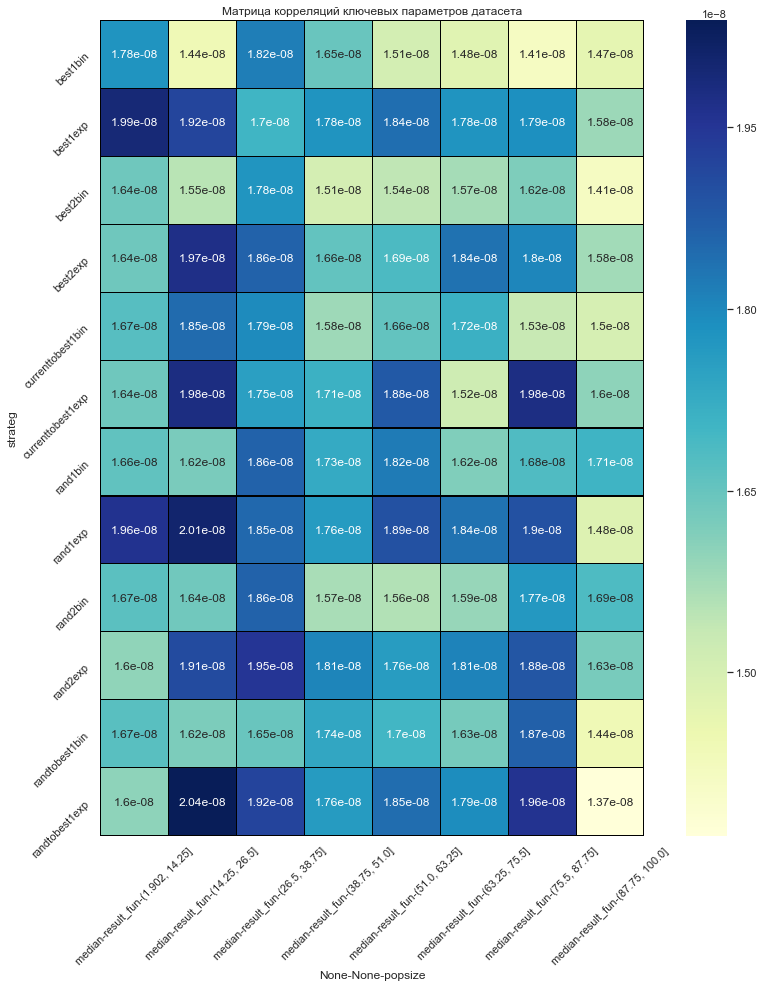

In [37]:
popsize_q = pd.cut(df.popsize,8)


table_01 = pd.pivot_table(df, 
                          values = ['result_fun'],  
                          index =   df.strateg,
                          columns = popsize_q, 
                          aggfunc = ['median'])

sns.set(rc={'figure.figsize':(15,15)})
ax = sns.heatmap(table_01,  
                annot = True, 
                fmt='.3g', 
                cmap= 'YlGnBu', 
                linewidths=0.1, 
                linecolor='black', 
                square=True)

plt.title('Матрица распределения медианы Y от вида Cтратегии и переменной Popsize')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)


### Посмотрим, как распределено значение целевой функции по медиане в зависмости от размера популяции и параметра мутации

(8.0, 0.0)

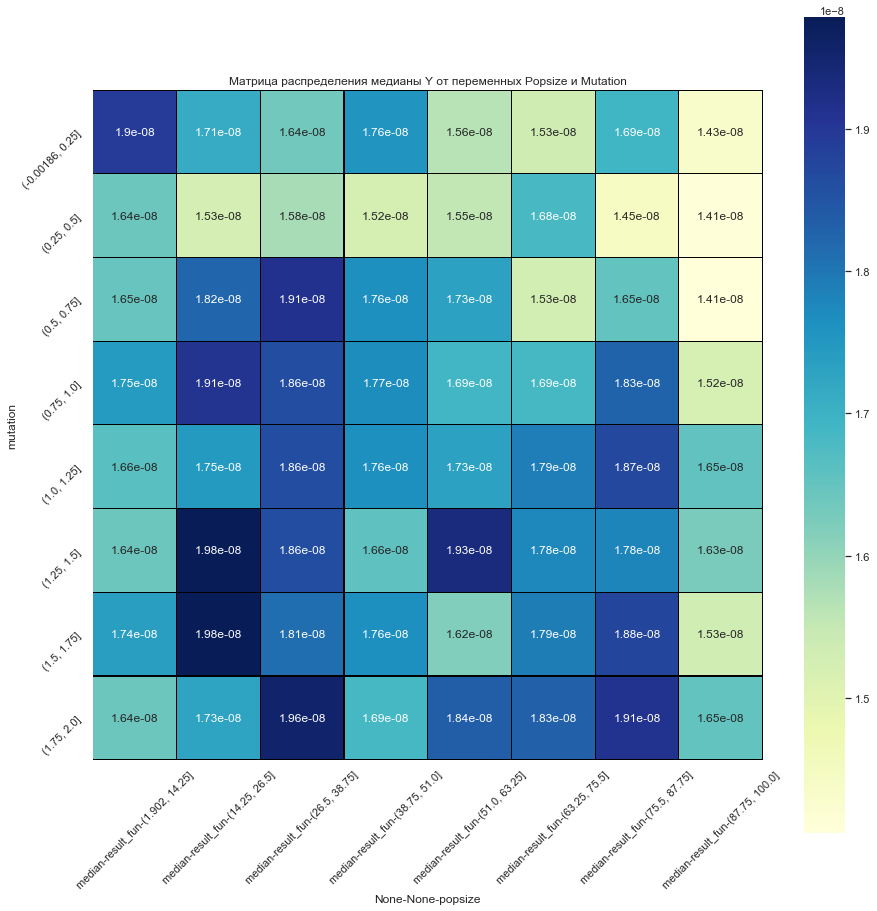

In [41]:
popsize_q  = pd.cut(df.popsize,8)
mutation_q = pd.cut(df.mutation,8)

table_01 = pd.pivot_table(df, 
                          values = ['result_fun'],  
                          index =   mutation_q,
                          columns = popsize_q, 
                          aggfunc = ['median'])

sns.set(rc={'figure.figsize':(15,15)})
ax = sns.heatmap(table_01,  
                annot = True, 
                fmt='.3g', 
                cmap= 'YlGnBu', 
                linewidths=0.1, 
                linecolor='black', 
                square=True)

plt.title('Матрица распределения медианы Y от переменных Popsize и Mutation')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

In [111]:
### Попробуем взглянуть на распределения параметров расчета по нескольким стратегиям

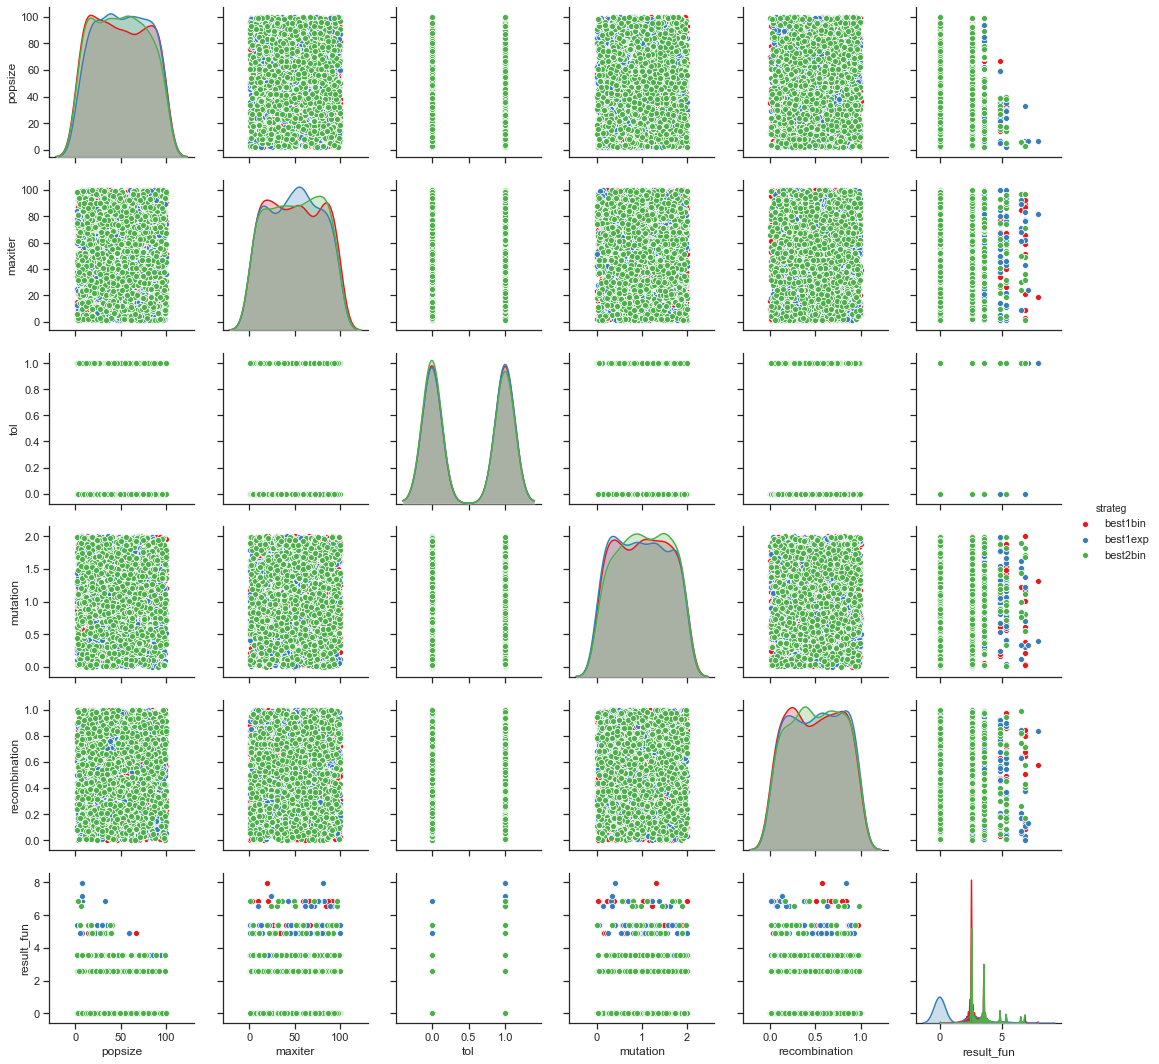

In [91]:
sns.pairplot(df.sort_values(by='strateg', ascending=True)[:3000], 
             hue='strateg', 
             palette='Set1')